In [1]:
from astropy.io import fits
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 14.0
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 2
import numpy as np
from numpy.random import default_rng

from simulate_voigt_complex import VoigtComplexSimulation

# Simulate data

In [2]:
seed = 123456
rng = default_rng(seed)
complex_name = "MnKa"

In [3]:
simul = VoigtComplexSimulation(
        name=complex_name,
        nphotons=8300,
        fwhm_g=2.2,
        xmin=5860,
        xmax=5920,
        nsampling=10001,
        rng=rng
    )

In [4]:
print(simul.nphotons, simul.nphotons_simul, simul.nleft, simul.nright)

8300 8083 96 121


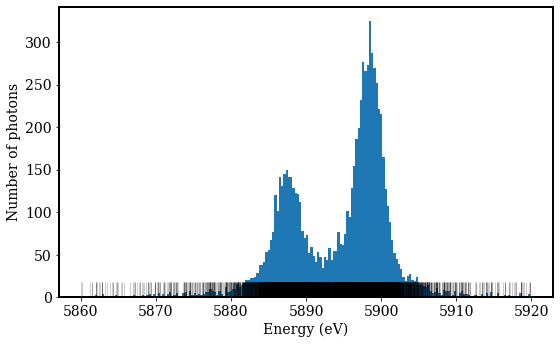

In [5]:
# plot data
nbins = 200
figsizex = 8
figsizey = 5

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(figsizex, figsizey))
values, bins, patches = ax.hist(simul.photons_simul, bins=nbins)
ax.plot(simul.photons_simul, [0]*simul.nphotons_simul, '|', color='k', markersize=30, alpha=0.2)
ax.set_xlabel('Energy (eV)')
ax.set_ylabel('Number of photons')
plt.tight_layout()
plt.savefig(f'test/hist_simulated_{complex_name}.pdf')
plt.show()

# Fit simulated data

Starting fitting process at.: 2022-07-27 18:48:39.324438


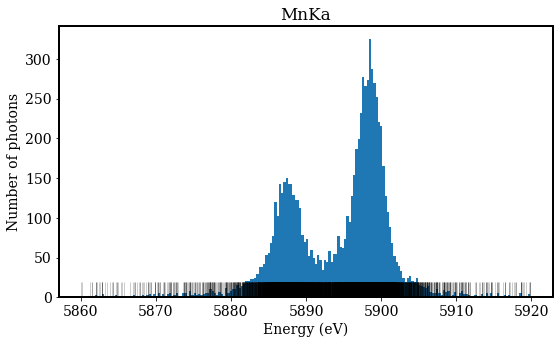

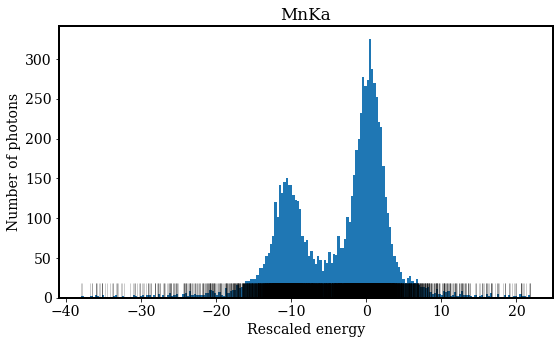

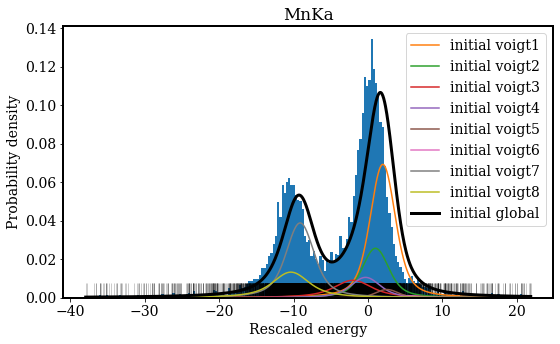

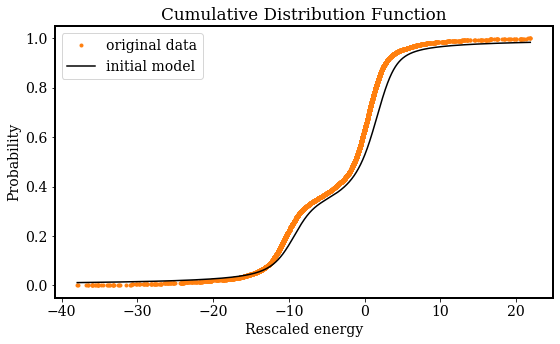


* Iteration #0
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
mu1            2      -10       10     None     True     None     None
nleft          0        0      inf     None    False     None     None
nright         0        0      inf     None    False     None     None
sigma      1.274      0.1       10     None     True     None     None
Minimization starts at: 2022-07-27 18:48:42.849623


* Resulting fitting parameters:
Minimization ends at..: 2022-07-27 18:48:58.758400
Elapsed time..........: 0:00:15.908777
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
mu1       0.8158      -10       10 0.0009876     True     None     None
nleft          0        0      inf        0    False     None     None
nright         0        0      inf        0    False     None     None
sigma      0.812      0.1       10 0.003429     True     None     None

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 19
    # data po

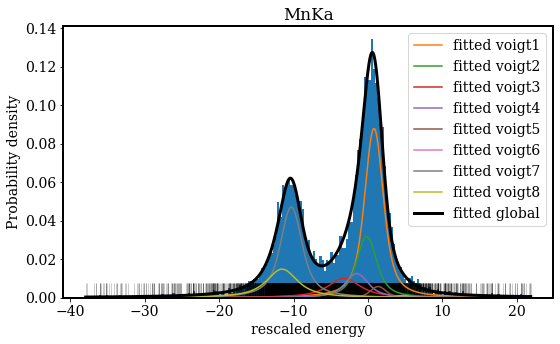

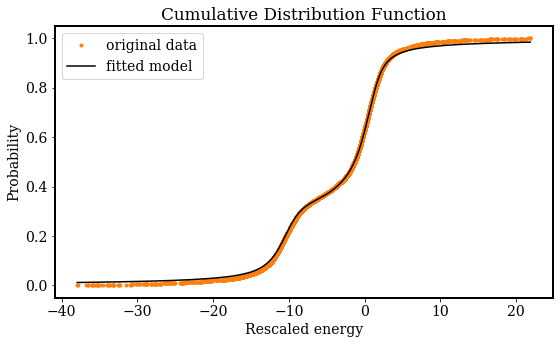

yecdf_data: [1.23716442e-04 2.47432884e-04 3.71149326e-04 ... 9.99752567e-01
 9.99876284e-01 1.00000000e+00]
ycdf_model: [0.01210568 0.01215839 0.01257079 ... 0.9847495  0.98478099 0.9848104 ]
nleft correction...: 97
nright correction..: 123

* Iteration #1
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
mu1       0.8158      -10       10     None     True     None     None
nleft         97        0      inf     None    False     None     None
nright       123        0      inf     None    False     None     None
sigma      0.812      0.1       10     None     True     None     None
Minimization starts at: 2022-07-27 18:49:00.260855


* Resulting fitting parameters:
Minimization ends at..: 2022-07-27 18:49:10.824582
Elapsed time..........: 0:00:10.563727
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
mu1       0.8572      -10       10 0.0003749     True     None     None
nleft         97        0      inf        0    False     None    

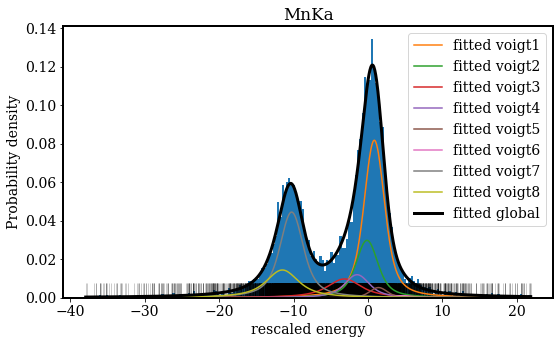

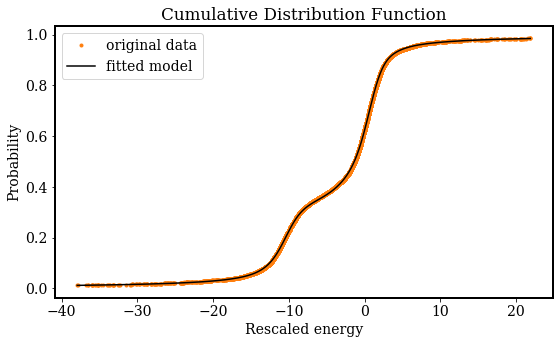

yecdf_data: [0.01180296 0.0119234  0.01204384 ... 0.9849452  0.98506564 0.98518608]
ycdf_model: [0.01209263 0.01214523 0.01255682 ... 0.98471788 0.98474952 0.98477906]
nleft correction...: 2
nright correction..: 3

* Iteration #2
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
mu1       0.8572      -10       10     None     True     None     None
nleft         99        0      inf     None    False     None     None
nright       126        0      inf     None    False     None     None
sigma     0.9433      0.1       10     None     True     None     None
Minimization starts at: 2022-07-27 18:49:12.281941


* Resulting fitting parameters:
Minimization ends at..: 2022-07-27 18:49:20.938070
Elapsed time..........: 0:00:08.656129
Name       Value      Min      Max   Stderr     Vary     Expr Brute_Step
mu1       0.8584      -10       10 0.0003816     True     None     None
nleft         99        0      inf        0    False     None     None
nright       126      

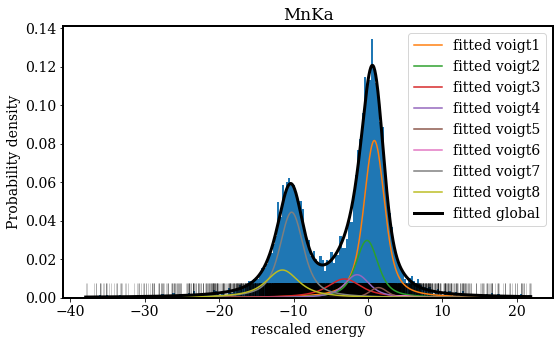

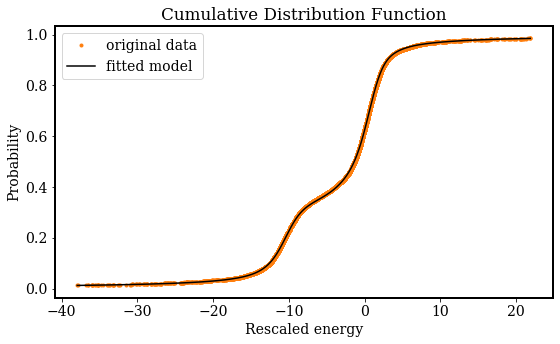

yecdf_data: [0.01203659 0.01215696 0.01227732 ... 0.98459316 0.98471353 0.9848339 ]
ycdf_model: [0.01209223 0.01214483 0.01255639 ... 0.98471696 0.98474861 0.98477816]
nleft correction...: 0
nright correction..: 0
Name        Value    Stderr
mu1     5898.8584 0.0003815532
nleft          99      None
nright        126      None
sigma   0.94633844 0.001248125


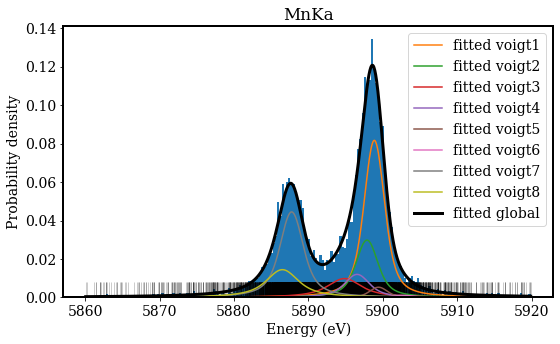

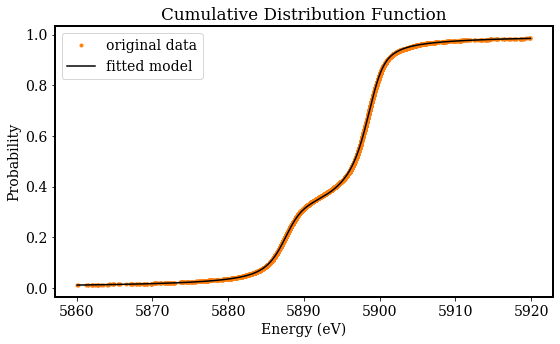


FWHM_G: 2.2285 +/- 0.0029 eV

Finishing fitting process at: 2022-07-27 18:49:24.751631
Elapsed time................: 0:00:45.427193
mu1, mu1_err......: 5898.8584 +/- 0.0004
fwhm_g, fwhm_g_err: 2.2285 +/- 0.0029
nleft.............: 99
nright............: 126


In [6]:
t1 = datetime.datetime.now()
print('Starting fitting process at.: {}'.format(t1))

mu1, mu1_err, fwhm_g, fwhm_g_err, nleft, nright = simul.fit_nvoigt_complex(
    fwhm_g_ini=3.0,
    mu1_ini=5900,
    plots=True,
    figsizex=figsizex,
    figsizey=figsizey,
    savepdf=True,
    verbose=True
)

t2 = datetime.datetime.now()
print('Finishing fitting process at: {}'.format(t2))
print('Elapsed time................: {}\r'.format(t2-t1))

print('mu1, mu1_err......: {:.4f} +/- {:.4f}'.format(mu1, mu1_err))
print('fwhm_g, fwhm_g_err: {:.4f} +/- {:.4f}'.format(fwhm_g, fwhm_g_err))
print('nleft.............: {}'.format(nleft))
print('nright............: {}'.format(nright))